In [32]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from sklearn.metrics import plot_confusion_matrix
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from keras.optimizers import Adam
from keras.utils import plot_model
from keras.models import load_model

In [33]:
model = keras.applications.vgg16.VGG16()

In [34]:
model.save('./VGG16_model.h5')
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [35]:
type(model)

keras.engine.training.Model

In [36]:
model_s = Sequential()
for layers in model.layers:
    model_s.add(layers)

In [37]:
model_s.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [38]:
model_s.layers.pop()

In [39]:
for layer in model_s.layers:
    layer.trainable=False

In [40]:
model_s.add(Dense(2,activation='softmax'))

In [41]:
model_s.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [11]:
model_s.save('./vgg16_2op.h5')

In [12]:
#model_s=load_model('./vgg16_2op.h5')

In [43]:
train_data_dir = './data/train'
valid_data_dir = './data/validation'
test_data_dir = './data/test'

In [44]:
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_data_dir,  # this is the target directory
        target_size=(224, 224),  # all images will be resized to 150x150
        batch_size=10,
        classes=['dogs','cats'])  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
valid_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        valid_data_dir,
        target_size=(224, 224),
        batch_size=10,
        classes=['dogs','cats'])   #class_mode='binary')
# this is a similar generator, for validation data
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_data_dir,
        target_size=(224, 224),
        batch_size=10,
        classes=['dogs','cats'])   #class_mode='binary')

Found 1950 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [45]:
# dimensions of our images.
img_width, img_height = 224, 224
nb_train_samples = 2000
nb_validation_samples = 1000
epochs = 50
batch_size = 16

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)
print(input_shape,'input_shape')

(224, 224, 3) input_shape


In [46]:
print(train_generator.class_indices)
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
print(labels)

{'dogs': 0, 'cats': 1}
{0: 'dogs', 1: 'cats'}


In [47]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
print(STEP_SIZE_TRAIN,STEP_SIZE_VALID,STEP_SIZE_TEST)

195 100 5


In [48]:
model_s.compile(optimizer='Adam',loss='binary_crossentropy',
              metrics=['accuracy'])

In [52]:
model_s.fit_generator(generator=train_generator,validation_data=valid_generator,\
                    steps_per_epoch=STEP_SIZE_TRAIN,validation_steps=STEP_SIZE_VALID,verbose=1,epochs=1,)

Epoch 1/1
195/195 [==============================] - 742s 4s/step - loss: 0.6920 - accuracy: 0.5487 - val_loss: 0.6887 - val_accuracy: 0.6570


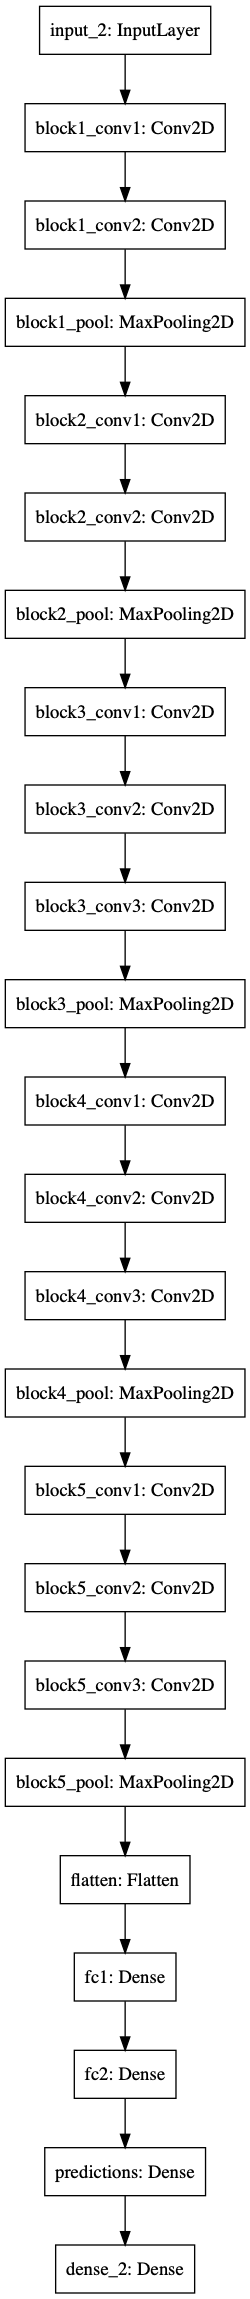

In [70]:
##Plot model
plot_model(model_s)
plot_model(model_s, to_file='model_s.png')

In [71]:
#model_s.save('./vgg16_5epoch_catdog.h5')
#model_s=load_model('./vgg16_5epoch_catdog.h5')

In [54]:
test_img,test_labels=next(test_generator)
pred=model_s.predict_generator(test_generator,steps=1,verbose=1)
predicted_class_indices=np.argmax(pred,axis=1)
test_labels_indices=np.argmax(test_labels,axis=1)
predictions = [labels[k] for k in predicted_class_indices]
test_labes=[labels[k] for k in test_labels_indices]
print(classification_report(test_labes,predictions))

1/1 [==============================] - 3s 3s/step
              precision    recall  f1-score   support

        cats       1.00      1.00      1.00         5
        dogs       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



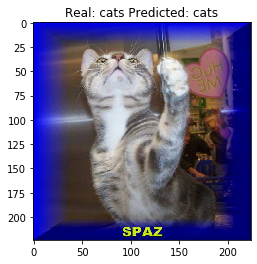

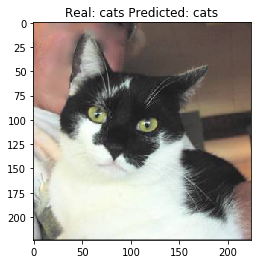

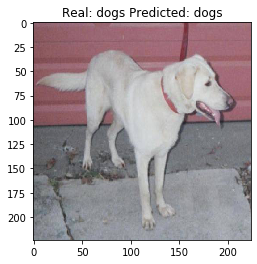

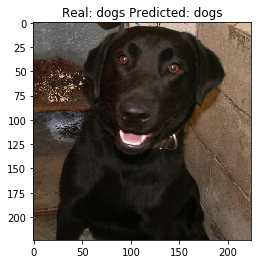

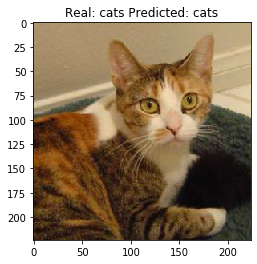

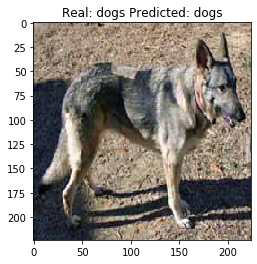

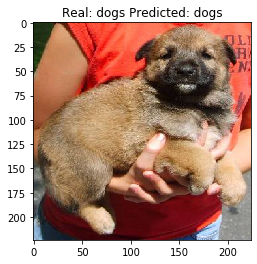

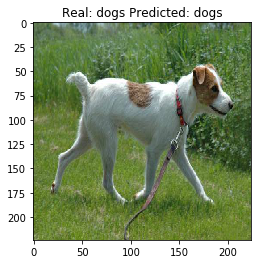

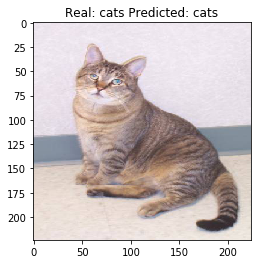

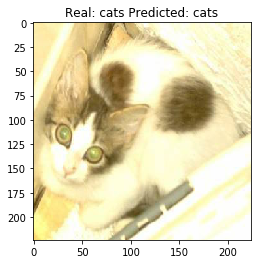

In [67]:
for i in range(10):
    plt.imshow(test_img[i])
    plt.title('Real: {} Predicted: {}'.format(test_labes[i],predictions[i]))
    plt.show()